In [1]:
import numpy as np
import healpy as hp 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib import rcParams
%config InlineBackend.figure_format = "retina"

rcParams["figure.figsize"] = (4,4)
rcParams["font.size"] = 18
rcParams["font.family"] = 'serif'
rcParams["figure.dpi"]= 120

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

#import logging 
#logging.basicConfig(level=logging.DEBUG)

# Import AstroPaint

In [2]:
import astropaint as ap
from astropaint import Catalog, Canvas, Painter
from astropaint.profiles import spherical, NFW


# Catalog

The `Catalog` object reads/simulates a halo catalog. The initial catalog must contain the following columns: 

`x` , `y`, `z`, `v_x`, `v_y`, `v_z`, `M_200c`

Instantiating the class without any input will create an empty dataframe.

In [3]:
catalog = Catalog()

Building the dataframe and updating all the parameters...

Done!


Extra parameters such as halo radius, distance, etc. can be build using the `.build_dataframe()` method which runs automatically when the catalog data are updated.  

The data frame is stored in the `.data` attribute. 

In [4]:
catalog.data.head()

x    y    z  v_x  v_y  v_z  M_200c  D_c  lat  lon  ...  R_200c  c_200c  \
0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  ...     0.0     inf   

   R_ang_200c  rho_s  R_s  v_r  v_th  v_ph  v_lat  v_lon  
0         NaN    NaN  0.0  0.0   0.0   0.0   -0.0    0.0  

[1 rows x 24 columns]

In [5]:
catalog.data.columns

Index(['x', 'y', 'z', 'v_x', 'v_y', 'v_z', 'M_200c', 'D_c', 'lat', 'lon',
       'redshift', 'theta', 'phi', 'D_a', 'R_200c', 'c_200c', 'R_ang_200c',
       'rho_s', 'R_s', 'v_r', 'v_th', 'v_ph', 'v_lat', 'v_lon'],
      dtype='object')

Random catalogs can be created using the `generate_random_shell()` or `generate_random_box()` methods to  distribute halos uniformly over a shell or in a cubic box. 

In [6]:
catalog.generate_random_shell(n_tot=1000,
                              shell_radius=30,
                              mass_min=1E14,
                              mass_max=1E15,)
                            

generating random catalog...

Catalog data has been modified...

Building the dataframe and updating all the parameters...

Done!


In [7]:
catalog.data.head()

x          y          z        v_x        v_y        v_z  \
0   2.681301 -21.345960  20.908387 -81.108440 -34.312803  58.181901   
1  -8.255285  16.507819 -23.650416  44.287835  14.284420  28.634461   
2  12.609753   1.631220  27.172288  77.203961  21.242445  71.453889   
3 -17.976251 -15.948514  17.958265 -22.073846  76.812553  54.034763   
4  26.880287   3.163567  12.939938 -41.303079  81.153781  38.812970   

         M_200c   D_c        lat         lon  ...    R_200c    c_200c  \
0  2.885684e+14  30.0  44.182509  277.159520  ...  1.394383  3.661421   
1  4.671540e+14  30.0 -52.031321  116.568871  ...  1.637265  3.494268   
2  1.024251e+14  30.0  64.923531    7.370949  ...  0.987267  4.048409   
3  3.895874e+14  30.0  36.770329  221.579411  ...  1.541111  3.556355   
4  3.524374e+14  30.0  25.552075    6.712319  ...  1.490481  3.591095   

   R_ang_200c         rho_s       R_s        v_r       v_th       v_ph  \
0  159.784474  1.378792e+14  0.380831  57.715107 -25.041123 -84.752520   
1  187.616781  1.245601e+14  0.468557 -26.900700 -12.072497 -45.999962   
2  113.132415  1.719419e+14  0.243865  98.324655  41.533347  11.162195   
3  176.598352  1.294114e+14  0.433340   4.737650 -63.915247 -72.108075   
4  170.796516  1.321752e+14  0.415049 -11.708859 -48.618573  85.425196   

       v_lat      v_lon  
0  25.041123 -84.752520  
1  12.072497 -45.999962  
2 -41.533347  11.162195  
3  63.915247 -72.108075  
4  48.618573  85.425196  

[5 rows x 24 columns]

Let's checkout the 2D projection of the catalog in the $x$-$y$ plane.

In [8]:
plt.scatter(catalog.data.x, catalog.data.y, s=0.5)

Great! Now let's put these halos on a canvas.

# Canvas 

The `Canvas` object locates the halo centers and extents on a healpy map. We can initialize it by feeding in a `Catalog` object and an `nside` for the map. 

In [9]:
canvas = Canvas(catalog,
                nside=256,
                R_times=1,
               )

Let's check out the locations of the halos with a scatter plot

In [10]:
canvas.show_halo_centers("mollview",
                        marker='.',
                        )

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


and in cartesian projection

0.0 135.5224878140701 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


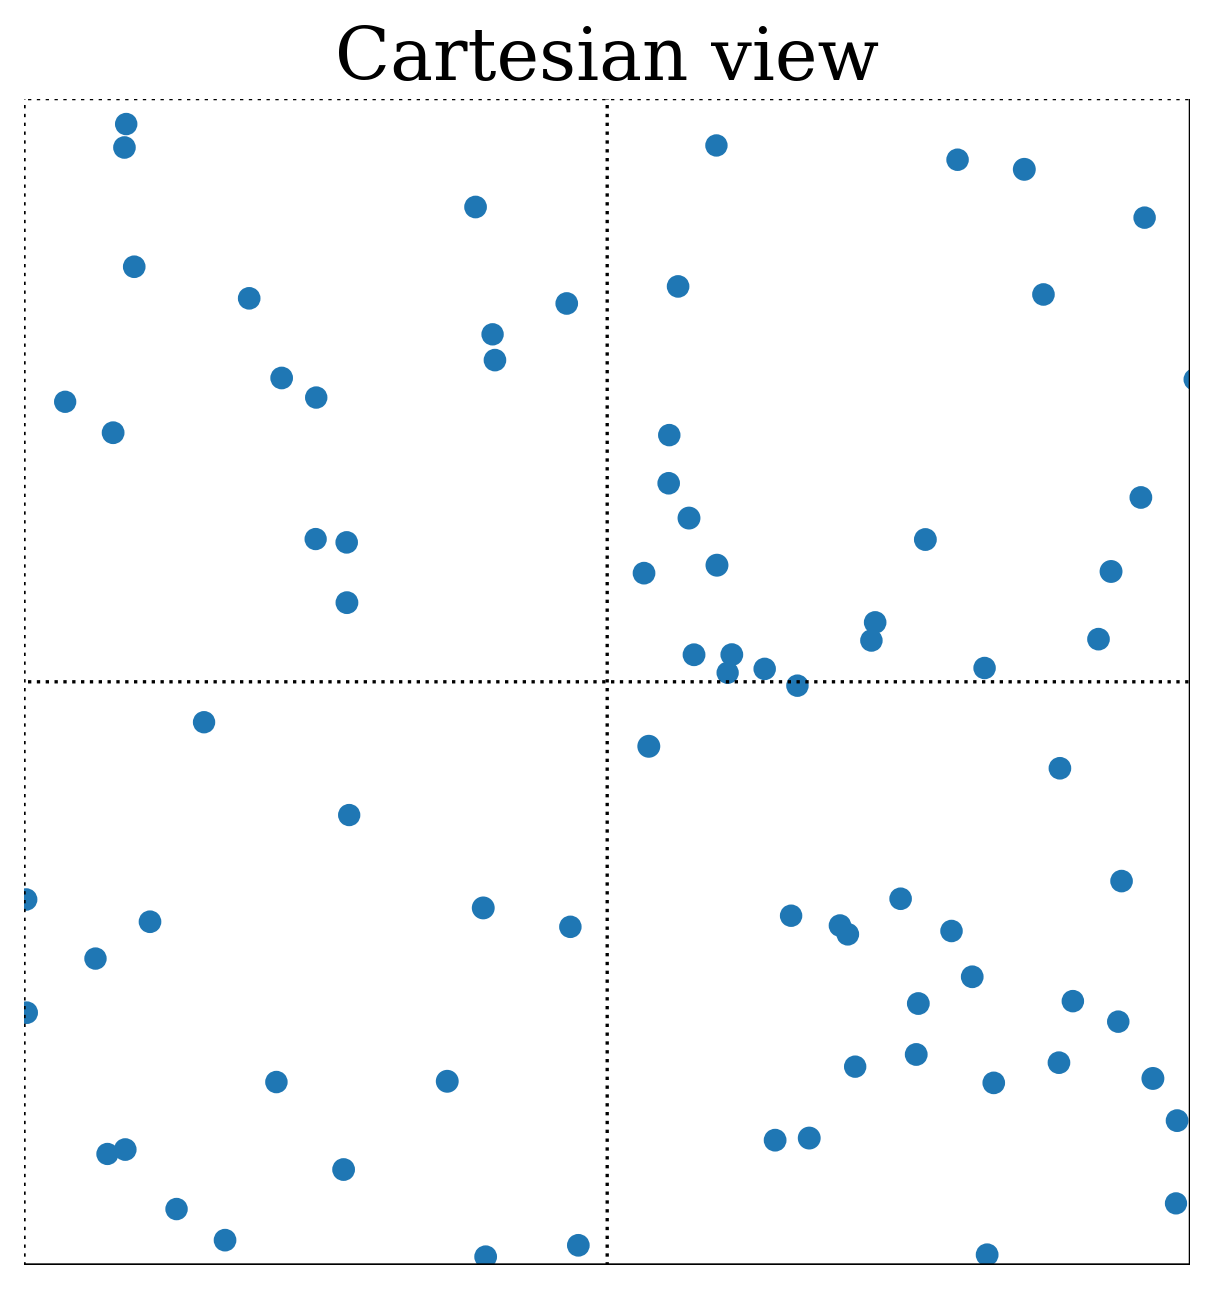

In [11]:
canvas.show_halo_centers("cartview",
                        lonra=[0,60],
                        latra=[0,60],
                        )

The canvas provides methods for carving discs around halo centers. These methods can be accessed through the `discs` inner class. The radii of the discs are set by the parameter `R_times` passed to the canvas upon instantiation. 

Let's check out the discs

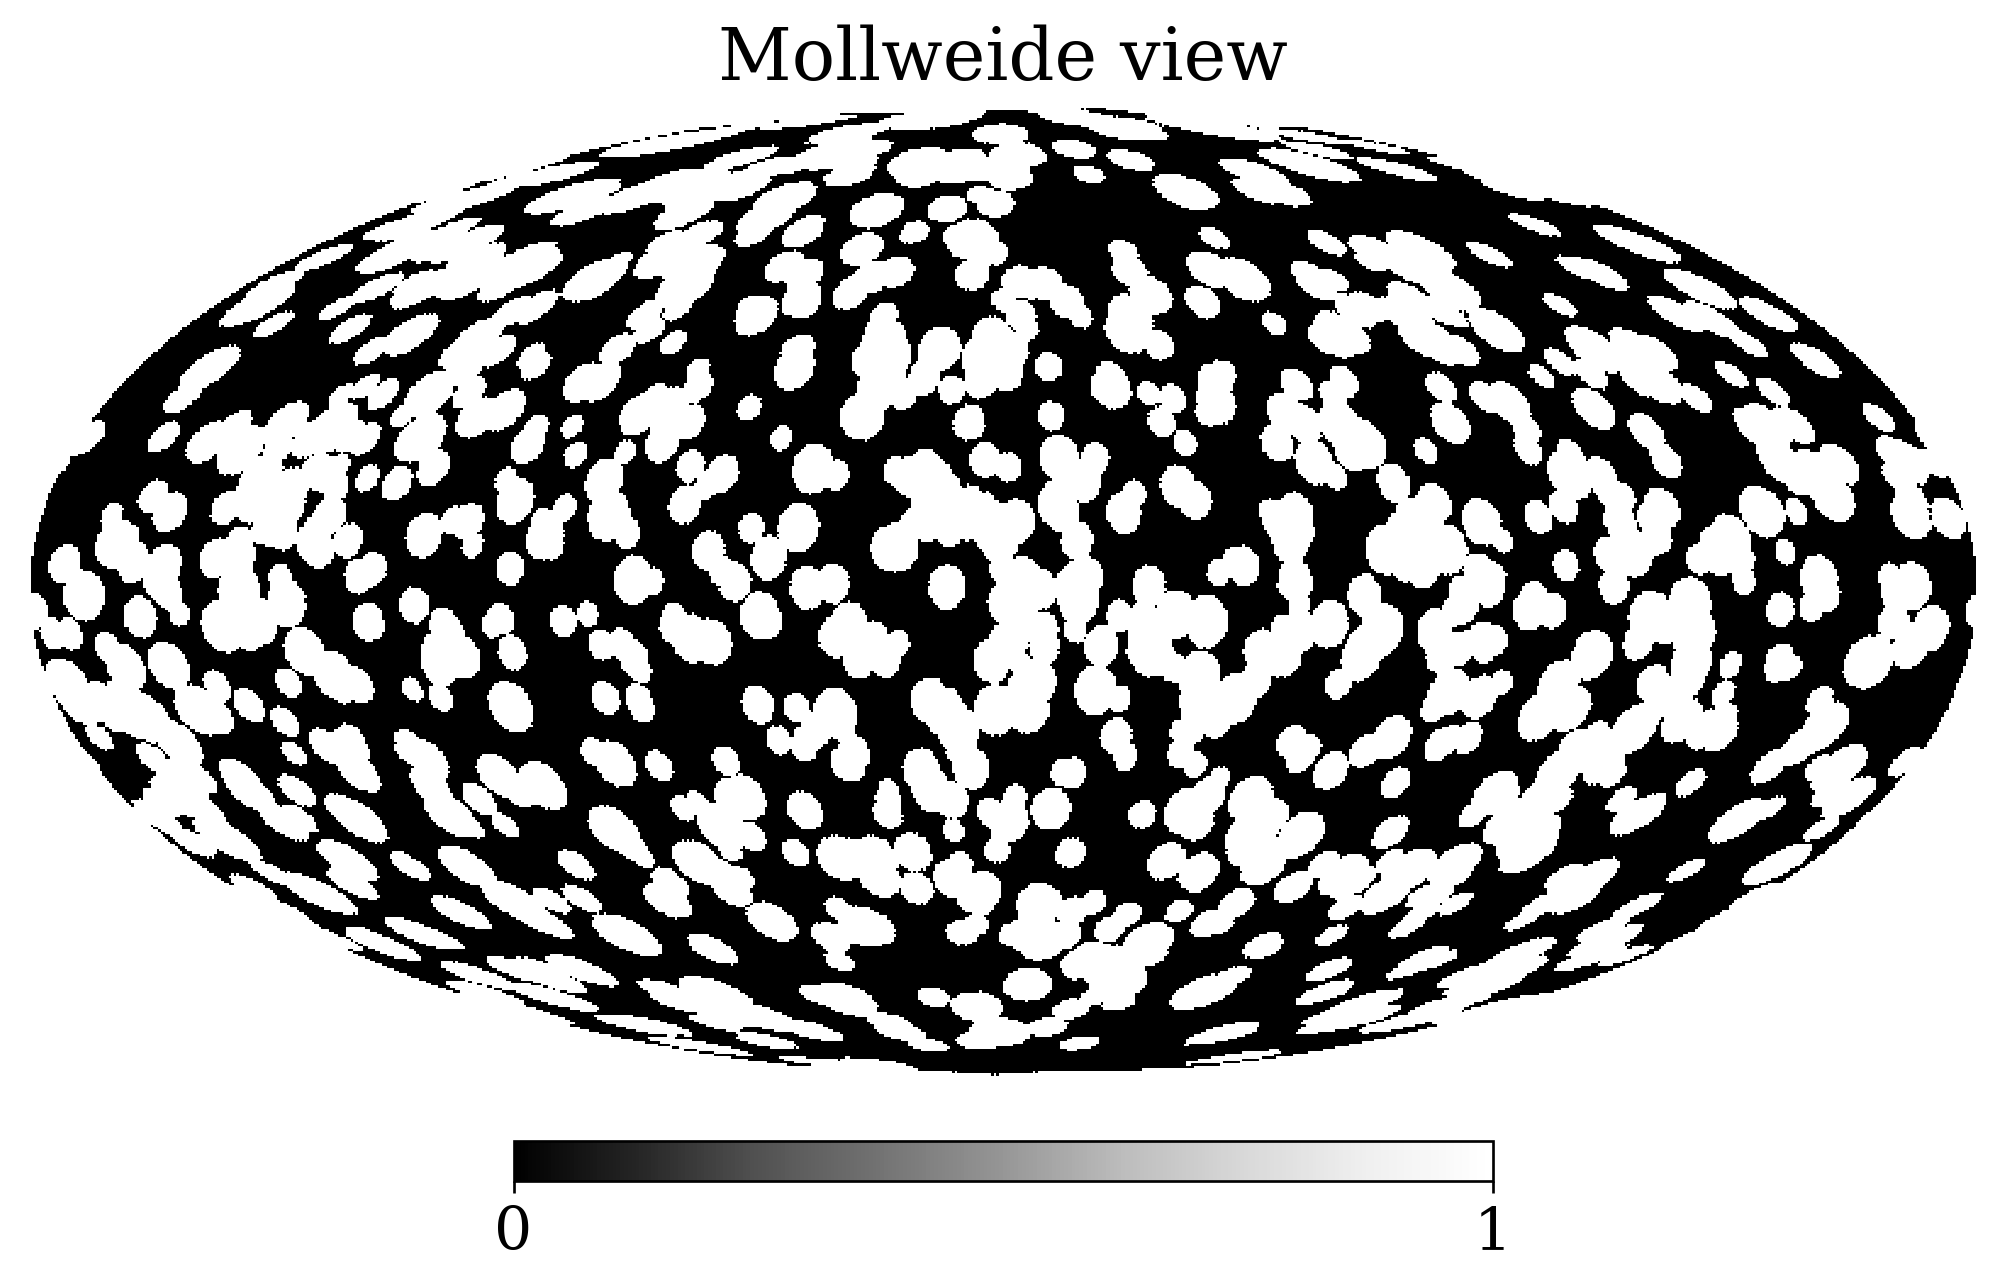

In [12]:
canvas.cmap = cm.Greys_r
canvas.show_discs()

# Painter

The `Painter` object paints a signal on top of the canvas according to an input template

In [13]:
painter = Painter(template=spherical.solid_sphere_2D)

The template 'solid_sphere_2D' takes in the following arguments:
['R', 'M_200c', 'R_200c']



In [14]:
# change the color map to RdYlBu
canvas.cmap = cm.RdYlBu_r

If the canvas has been painted on previously, it can be cleaned using `.clean()`

In [15]:
canvas.clean()

The painter paints the signal on the canvas using the `.spray()` method

In [16]:
painter.spray(canvas, n_cpus=-1, cache=False)

Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['R_200c', 'M_200c'], dtype='object')
Spraying in parallel...

canvas memory size [GB]: 0.005859464406967163

n_cpus = 8
Spraying in 8 batches










Your artwork is finished. Check it out with Canvas.show_map()


By default `n_cpu=-1` makes the painter use all available cpus to paint the canvas in parallel. 

*Memoization tip for slow painting jobs*: Turning `cache=True` will save all the calculated profiles to disc, which makes subsequent runs faster. If the painter finds the cached values of functions on disc, it simply reads the output instead of calculating it.  


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


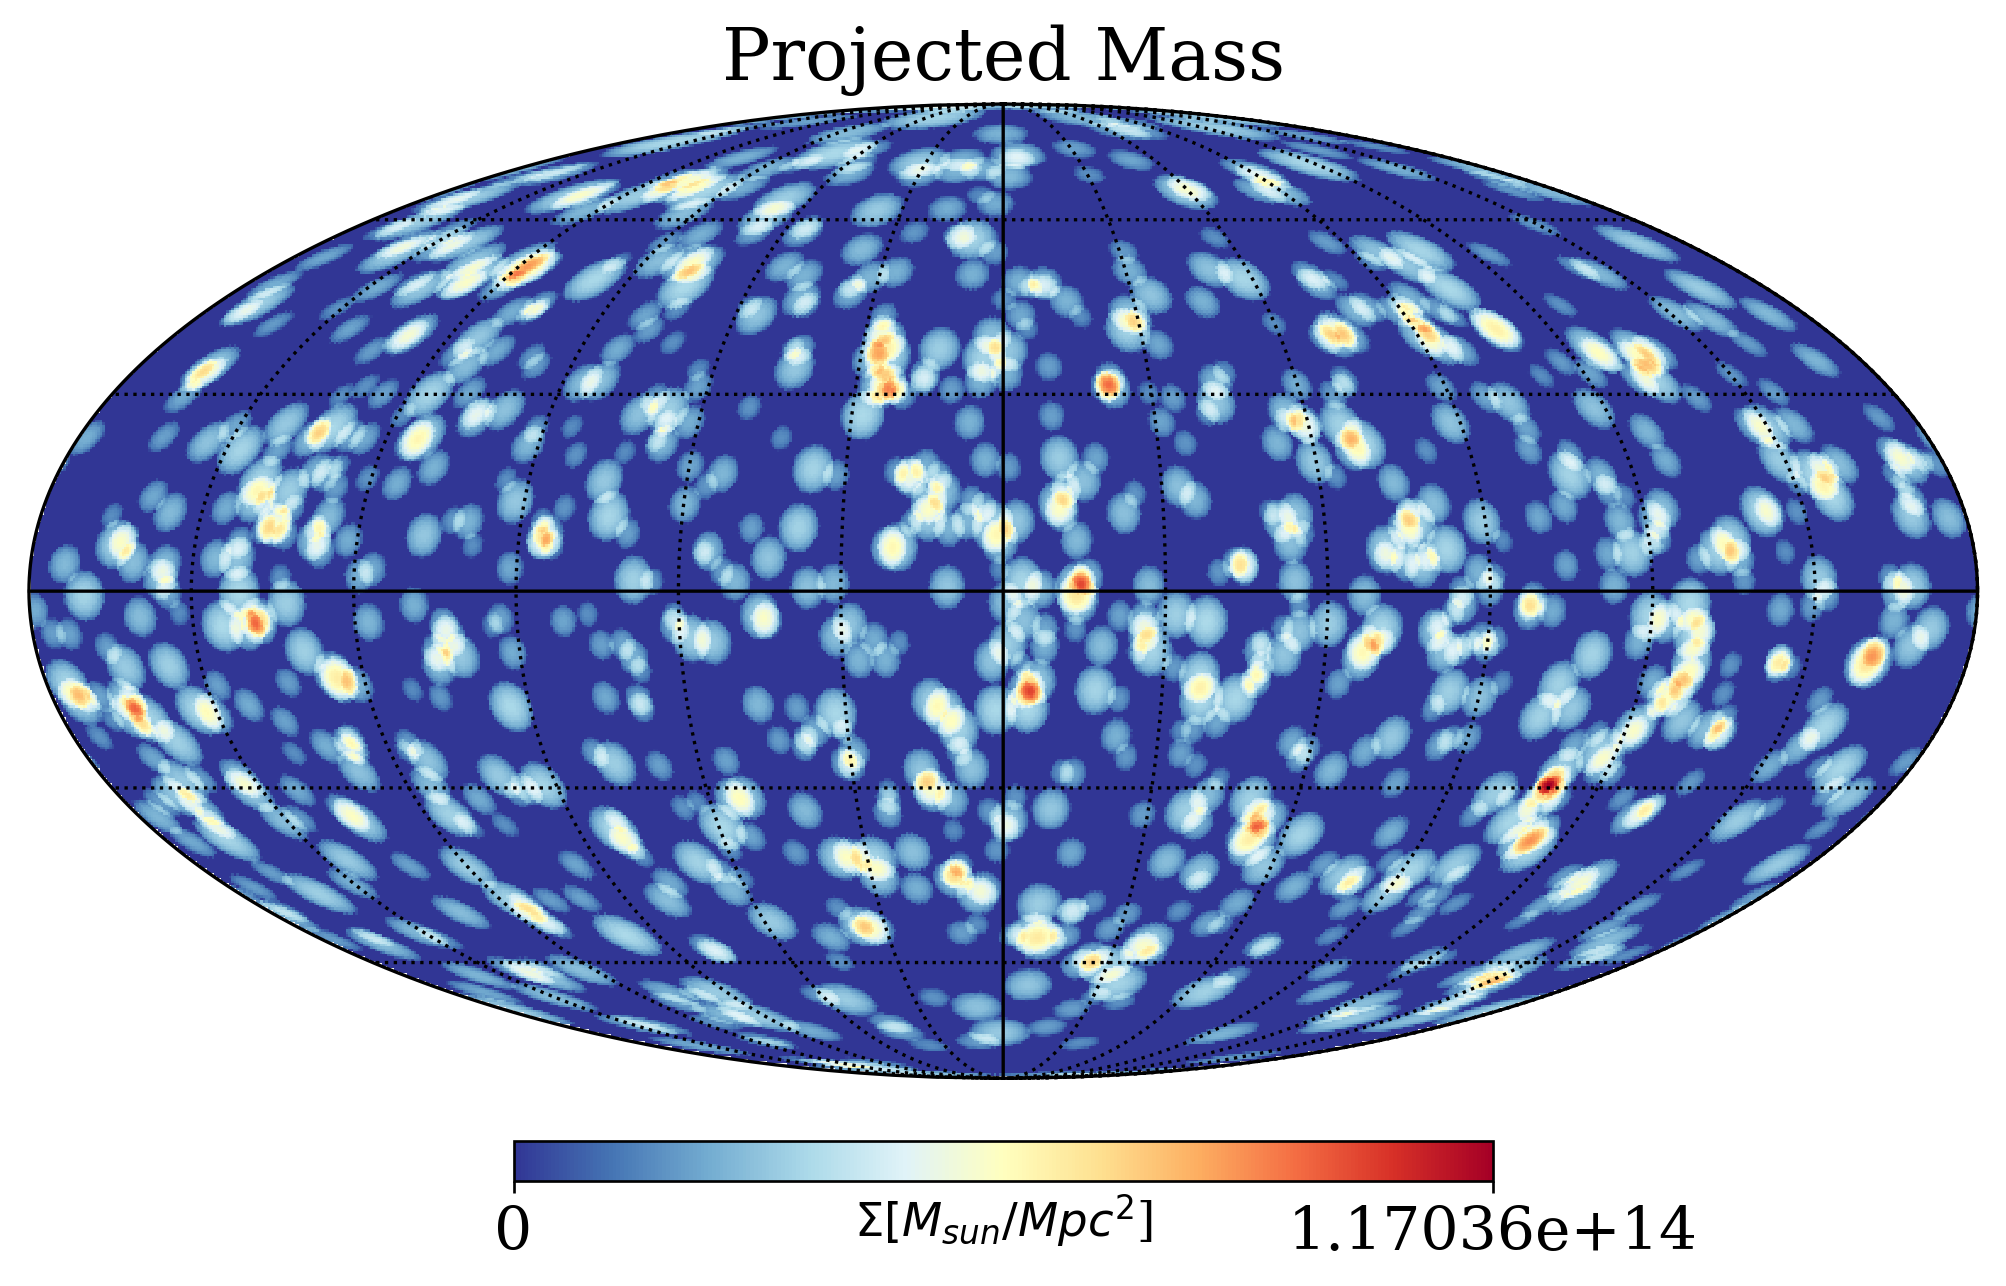

In [17]:
canvas.show_map(projection="mollview",
                title="Projected Mass",
                unit="$\Sigma [M_{sun}/Mpc^2$]")
hp.graticule()

33.59037789072914 116.40962210927087 -27.870395409510863 57.87039540951086
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


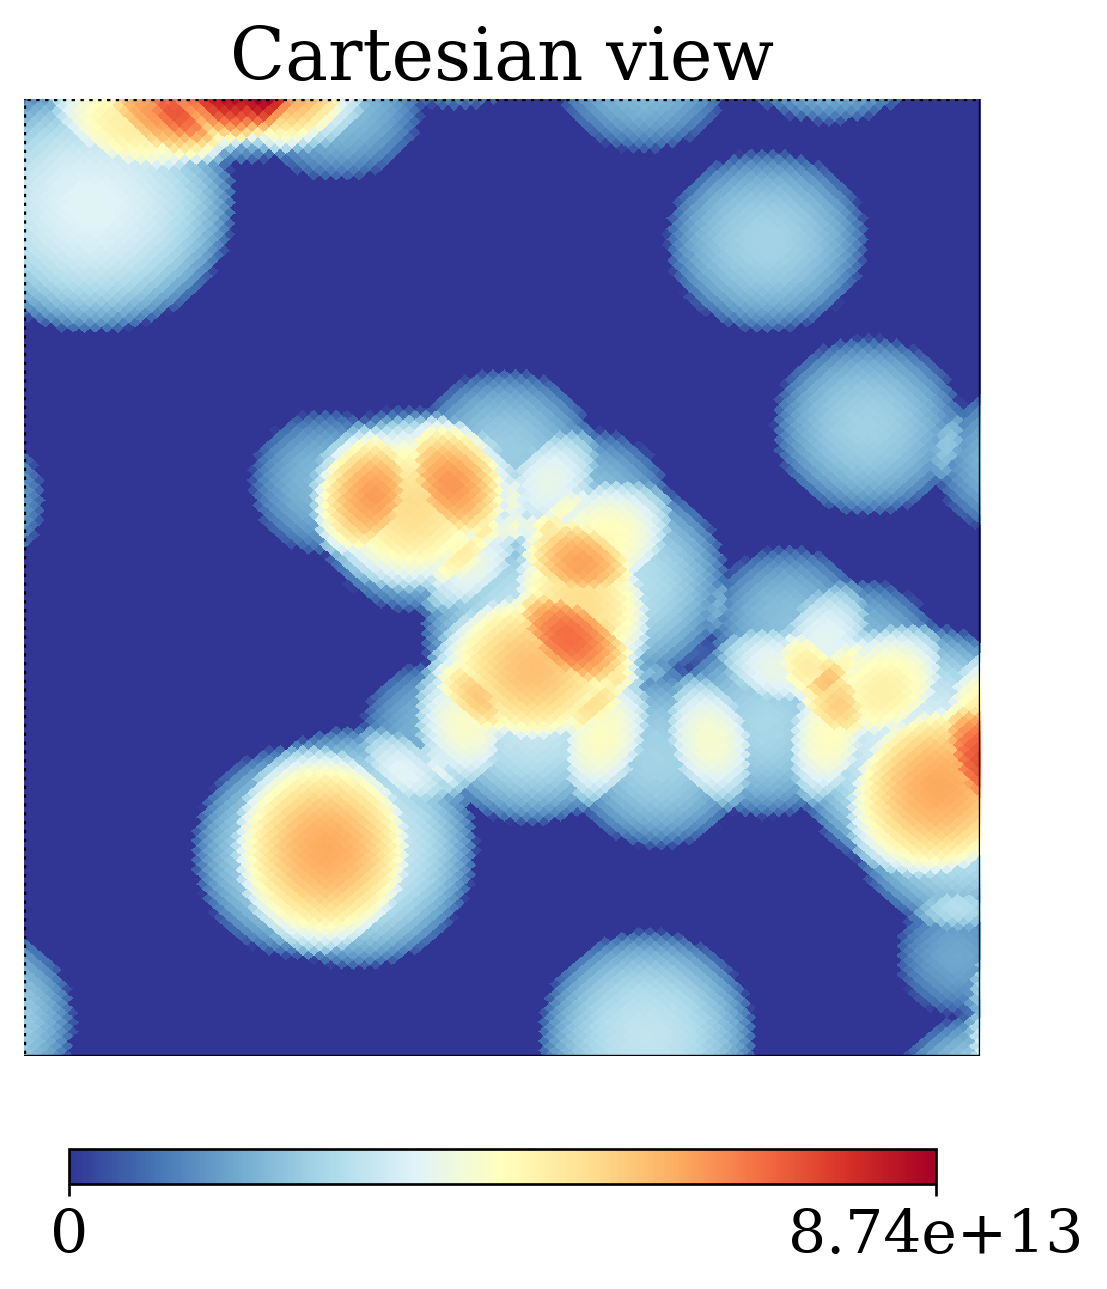

In [18]:
canvas.show_map(projection="cartview",
               lonra=[0,30],
               latra=[0,30])
hp.graticule()


The painter can take any arbitrary function that takes `R` as the first argument. To demonstrate this, let's define an absurd radial profile that oscilates as `sin(5*R/R_200c)` and is proportional to `M_200c`! 

In [19]:
def crazy_profile(R, R_200c, M_200c):
    
    return np.sin(4*R/R_200c)*M_200c

In [20]:
painter = Painter(crazy_profile)

The template 'crazy_profile' takes in the following arguments:
['R', 'R_200c', 'M_200c']



In [21]:
canvas.clean()
painter.spray(canvas)
canvas.show_map()

Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['R_200c', 'M_200c'], dtype='object')
Spraying in parallel...

canvas memory size [GB]: 0.005859464406967163

n_cpus = 8
Spraying in 8 batches










Your artwork is finished. Check it out with Canvas.show_map()


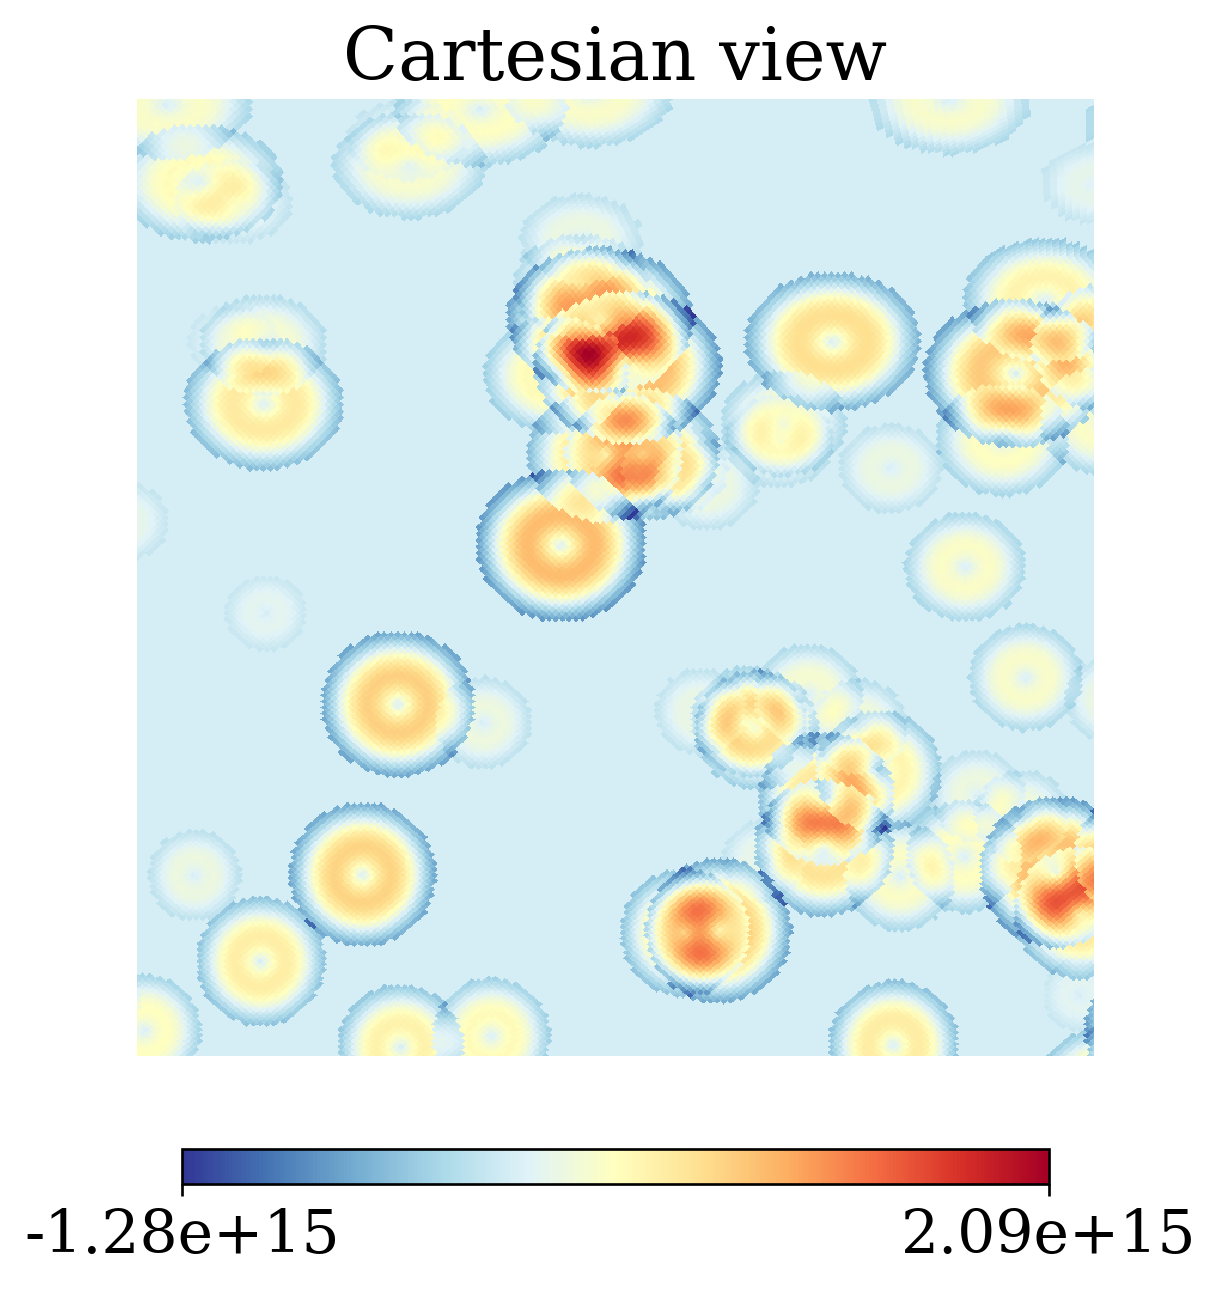

In [22]:
canvas.show_map("cartesian",
               lonra=[0,50],
               latra=[0,50])

Notice that we didn't have to define `R_200c` or `M_200c`! The painter looks up the function arguments in the catalog and uses them if they exist. 

# Power Spectrum:  $a_{\ell m}$ and $C_{\ell}$ 

The power spectrum of the map is calculated using `canvas.get_Cl()` and is stored in `canvas.Cl` and `canvas.Dl`. Similarly for $a_{\ell m}$ coefficients can be accessed via `canvas.alm`. Let's checkout the power spectrum of the previous map. 

alms saved in canvas.alm


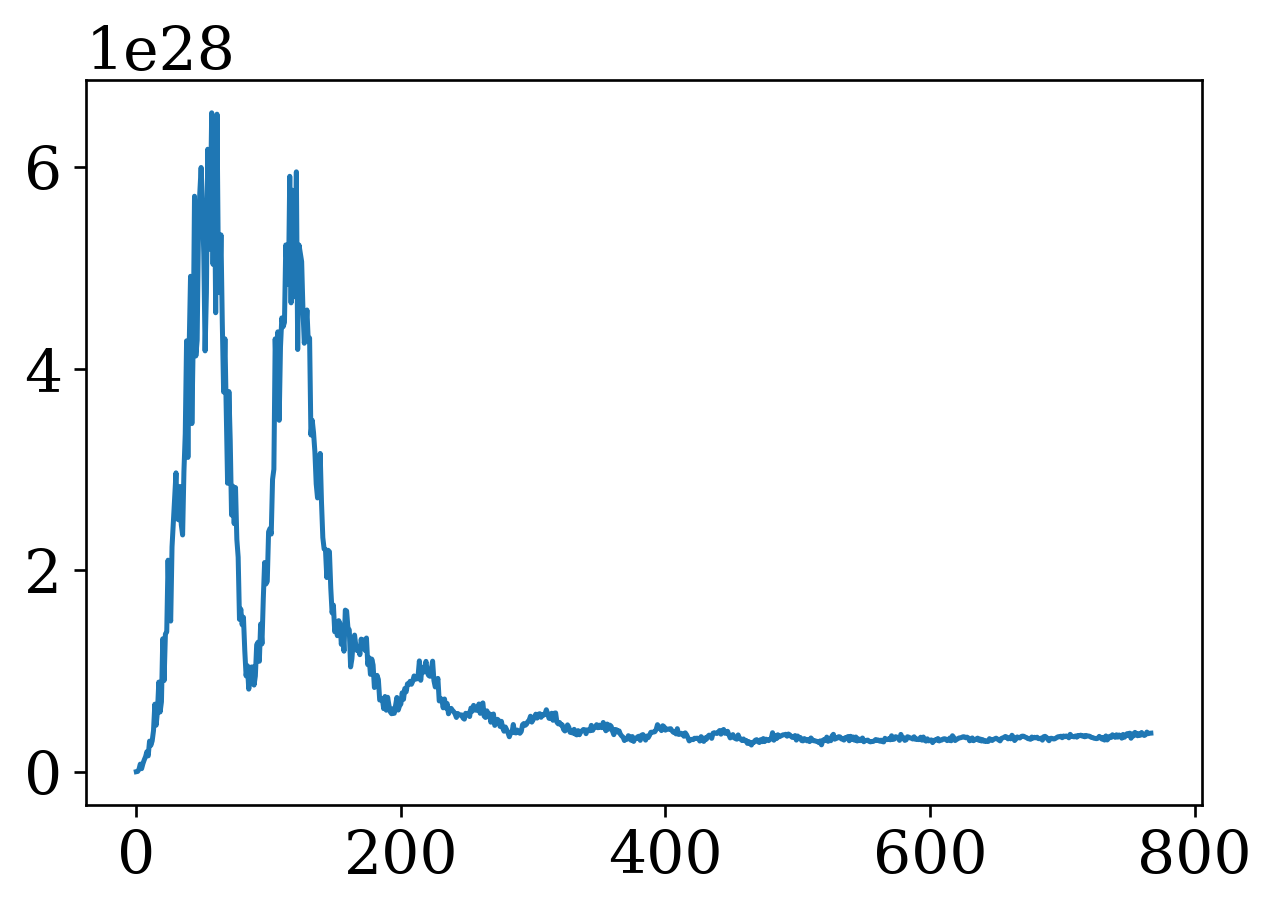

In [23]:
plt.figure(figsize=(6,4))
_ = plt.plot(canvas.Dl)

Using the `canvas.mask_alm()` method you can keep or discard power on arbitrary angular scales. For example, let's get rid of all the modes beyond $\ell > 90$. 

In [24]:
canvas.mask_alm(lmax=90)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


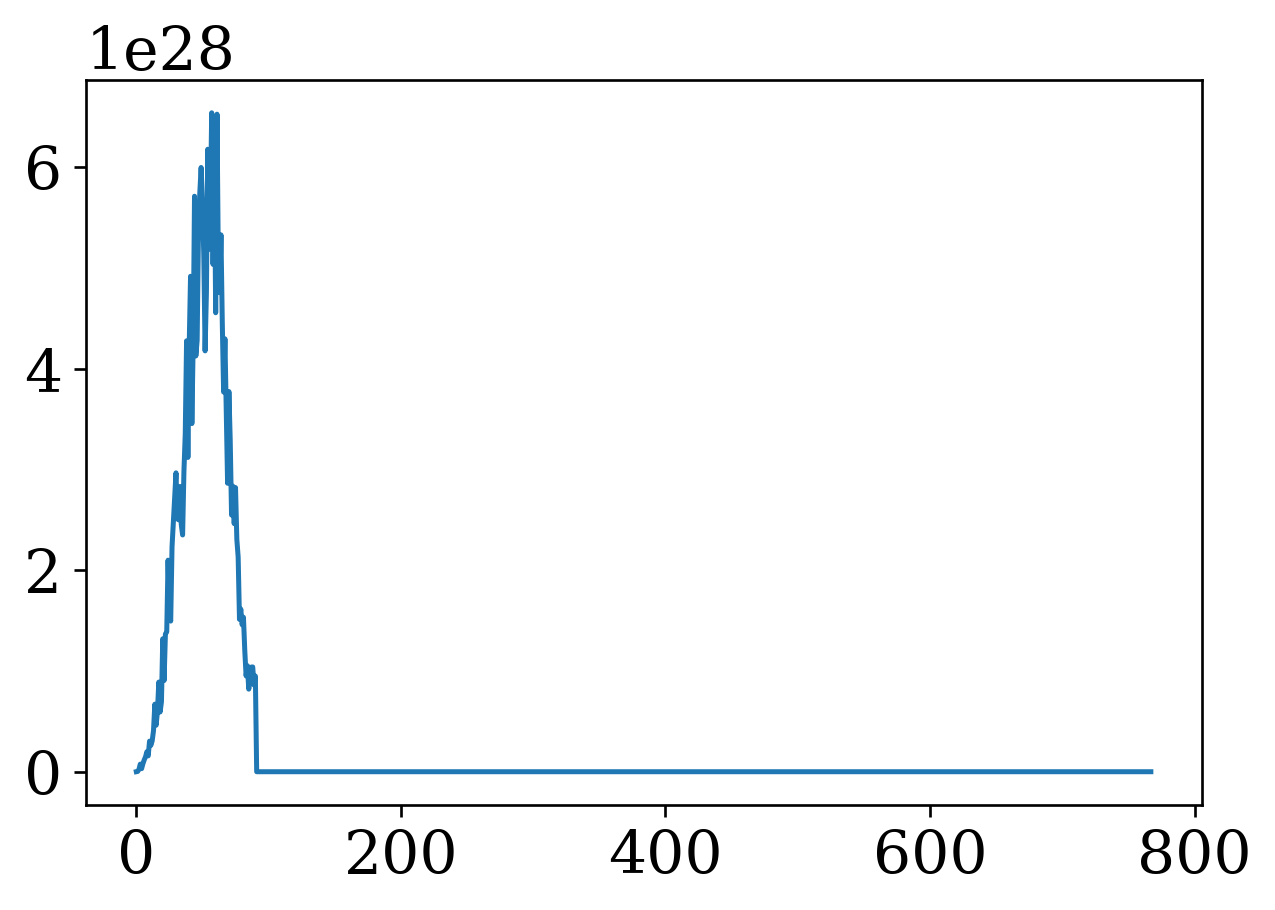

In [25]:
plt.figure(figsize=(6,4))
_ = plt.plot(canvas.Dl)

The map (`canvas.pixels`) are updated correspondingly.

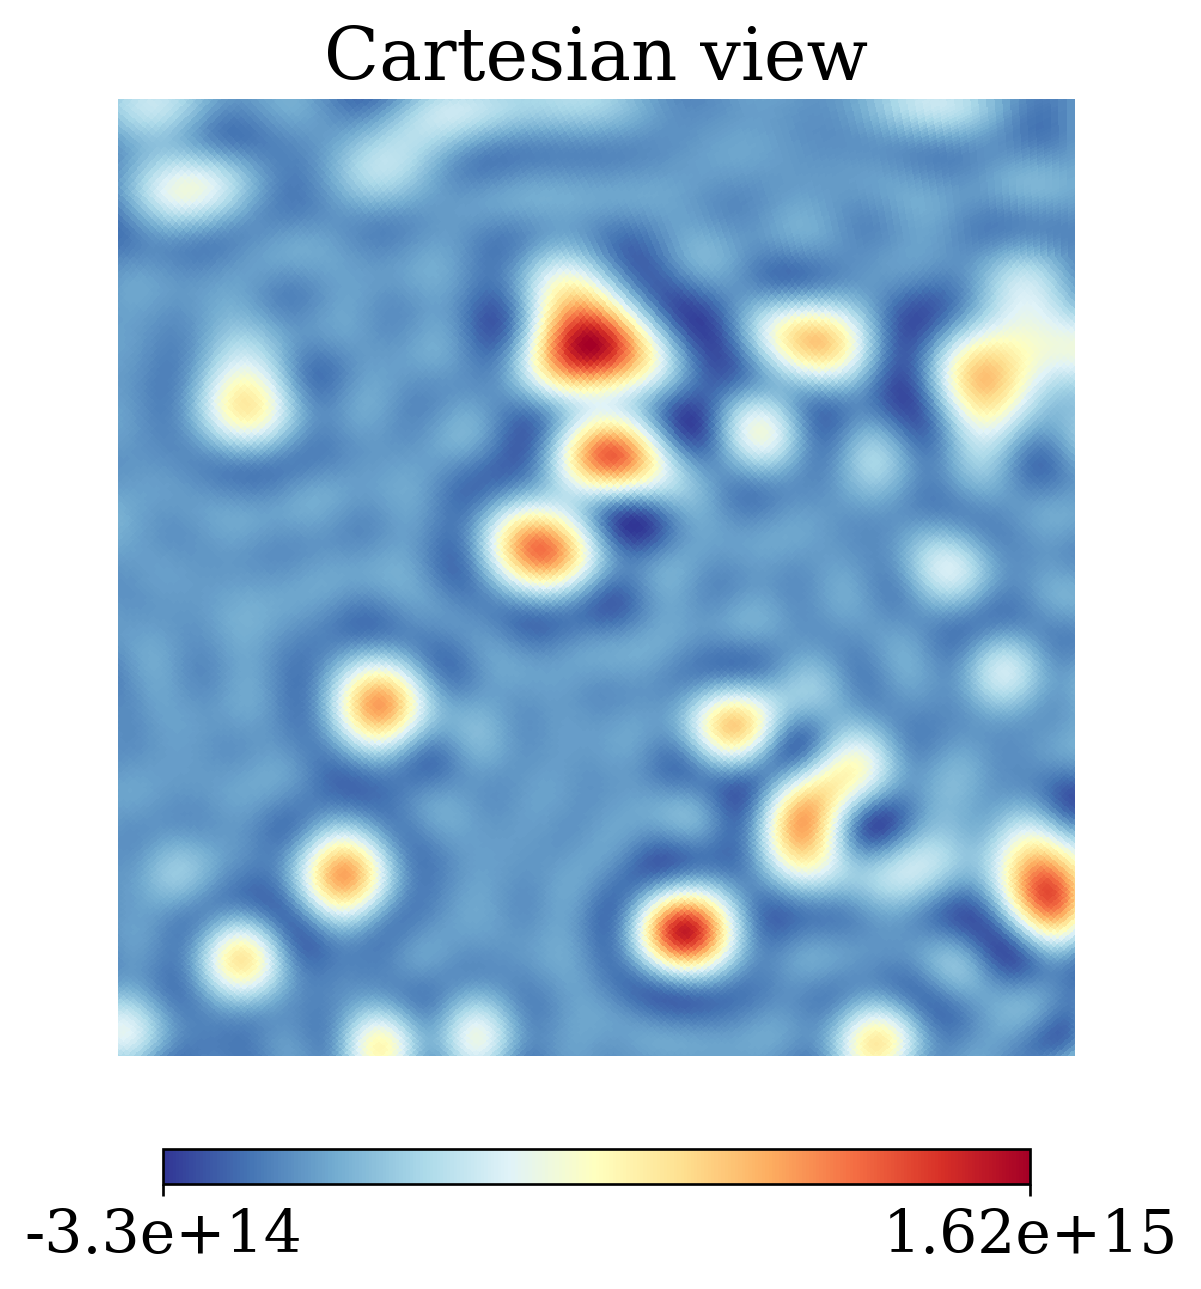

In [26]:
canvas.show_map("cartesian",
               lonra=[0,50],
               latra=[0,50])

# Stacking Cutouts 

Stacking cutouts with AstroPaint is very easy. 

In [32]:
catalog.generate_random_shell(n_tot=10,
                              shell_radius=20,
                              mass_min=1E14,
                              mass_max=1E15,)
                            
canvas = Canvas(catalog, nside=1024)   

painter = Painter(template=spherical.constant_density_2D)

generating random catalog...

Catalog data has been modified...

Building the dataframe and updating all the parameters...

Done!
The template 'constant_density_2D' takes in the following arguments:
['R', 'constant']



The template takes in an extra argument `constant` which does not appear in the catalog, so it has to be passed to the spray function.

In [33]:
painter.spray(canvas,
              constant=np.arange(1,catalog.size+1), n_cpus=1)

Painting the canvas...
The following parameters were not found in the canvas.catalog.data
['constant']
Make sure you pass them as kwargs (key=value), dictionary (**dict), or Pandas DataFrame (**df) in the .spray method. Check the spray docstring(.spray.__doc__) for examples. 
spray_df.columns = Index(['constant'], dtype='object')



Your artwork is finished. Check it out with Canvas.show_map()


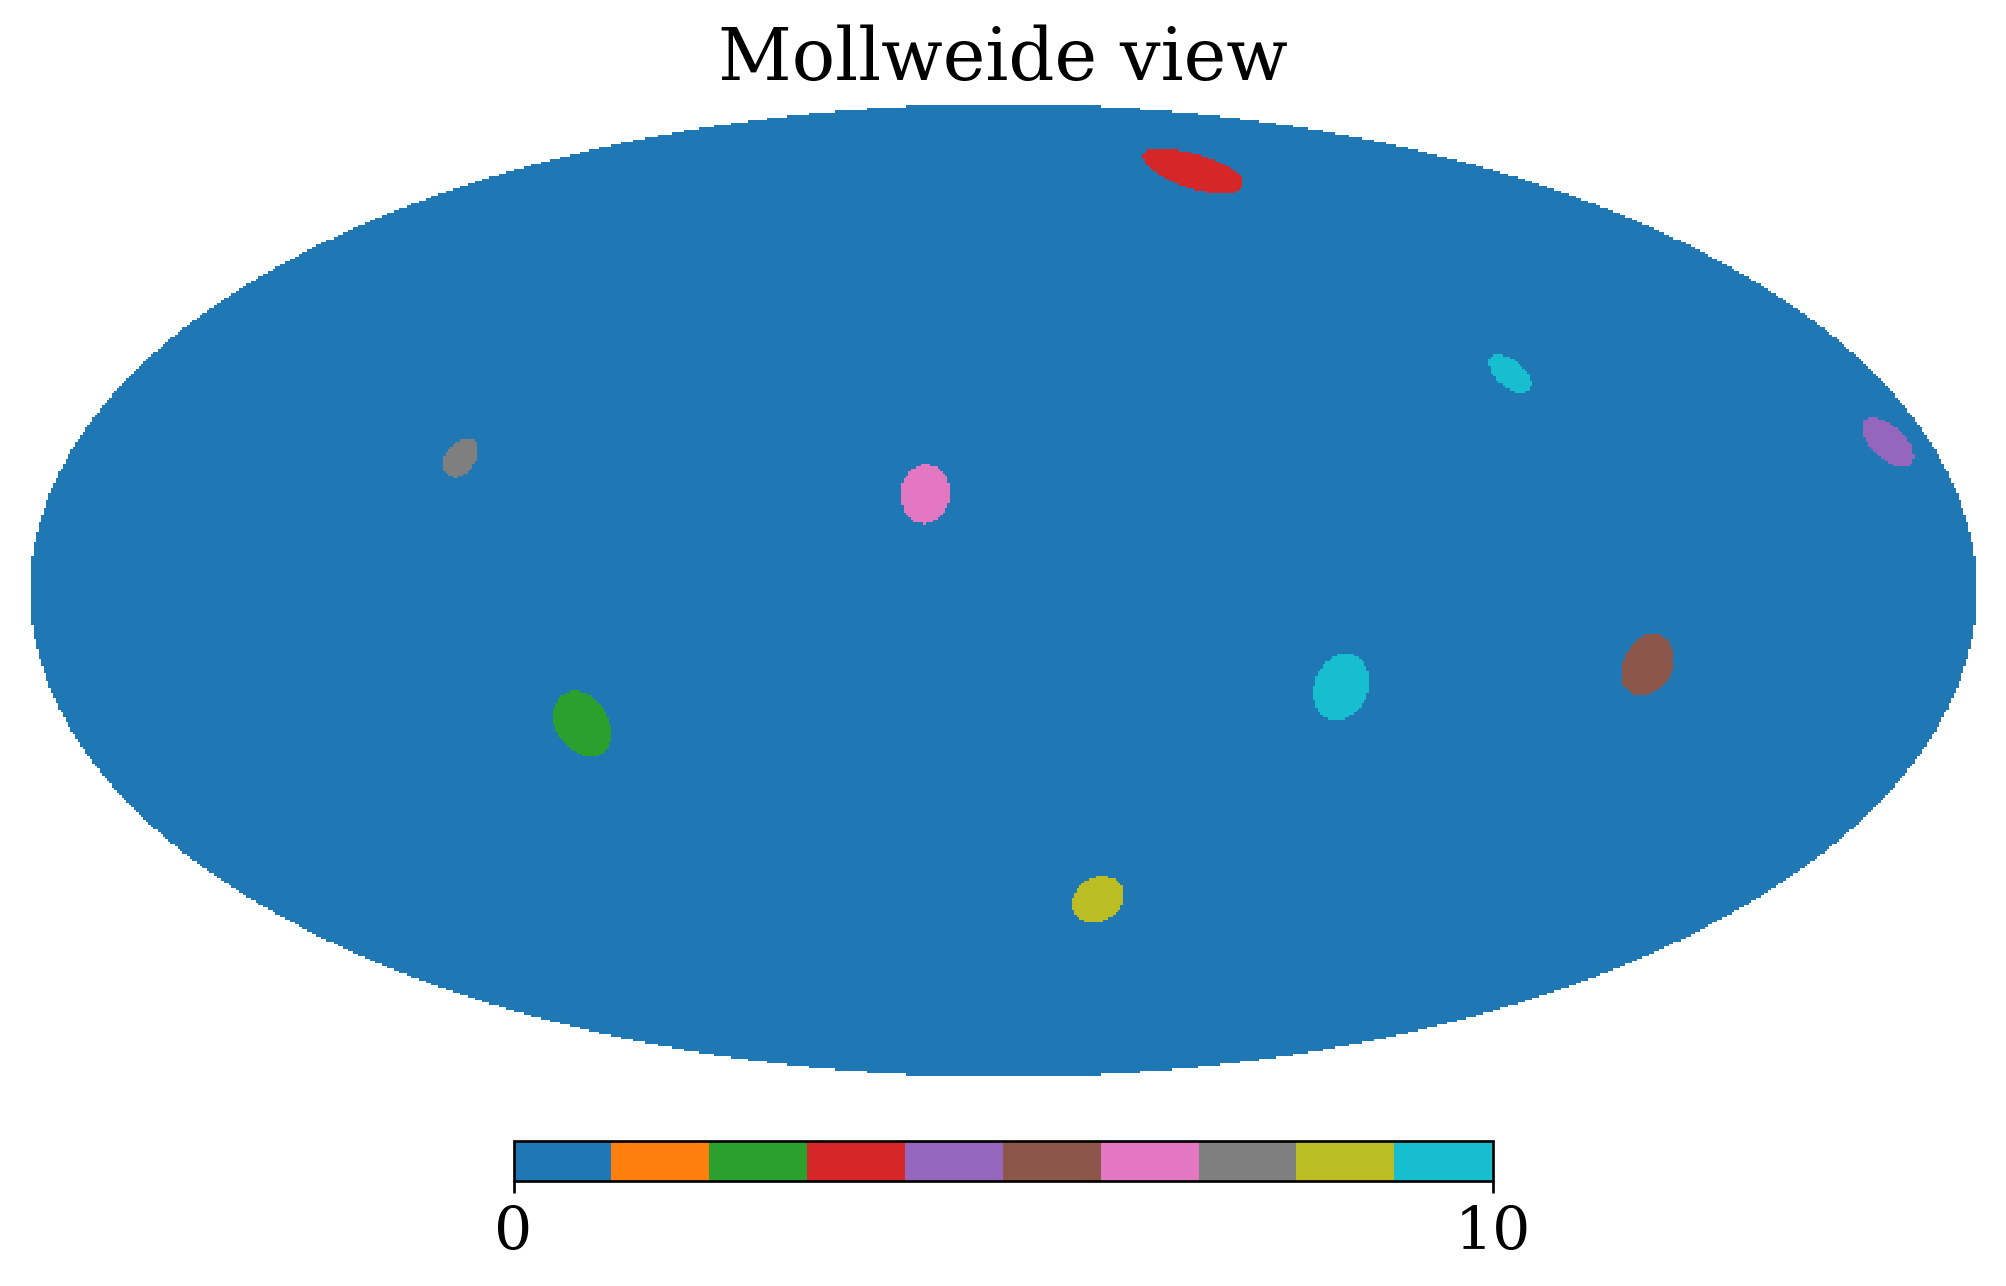

In [34]:
canvas.cmap = cm.tab10
canvas.show_map()

The `stack_cutouts` method cuts out patches around halos and stacks them on top of each other. The cutouts are extracted using the `healpy.projector.CartesianProj`.


Checkout the result with canvas.stack


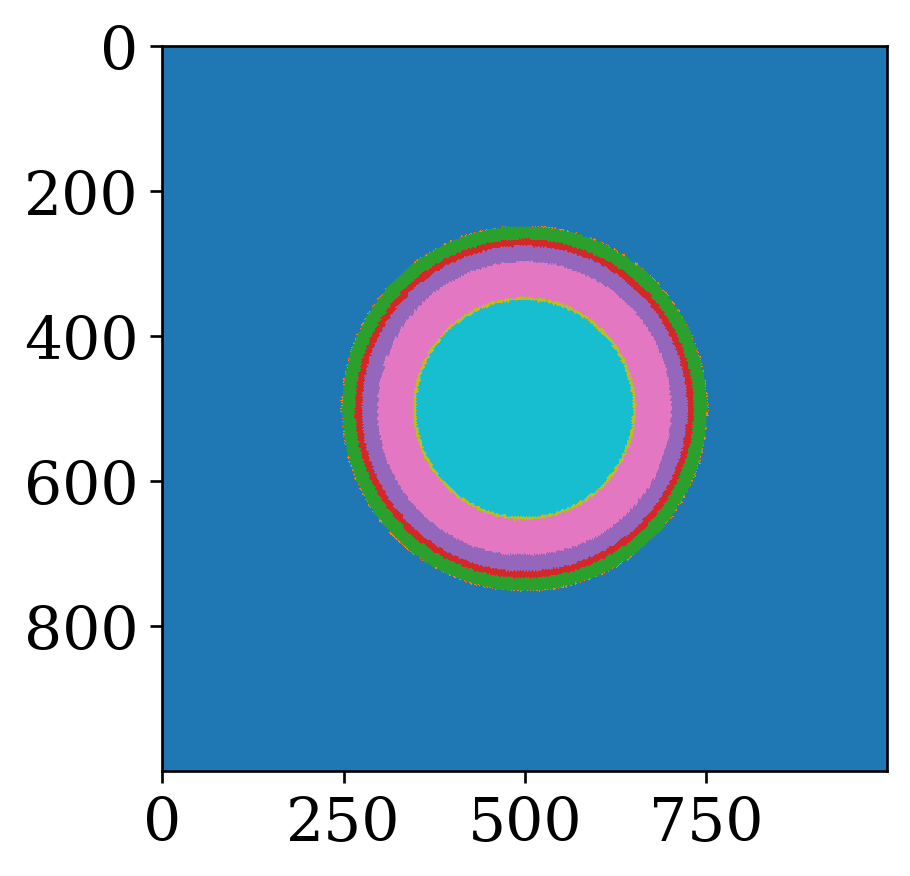

In [35]:
stack = canvas.stack_cutouts(halo_list="all", 
                             lon_range=[-10,10],
                             lat_range=[-10,10],
                             xpix=1000,
                             inplace=False)

plt.imshow(stack, cmap=canvas.cmap)

if you want to see the individual cutouts you can use the `cutouts` generator.


In [36]:
n_cutouts = 5
stack_generator = canvas.cutouts(halo_list=range(n_cutouts),
                                 lon_range=[-10,10],
                                 lat_range=[-10,10],
                                 xpix=1000)

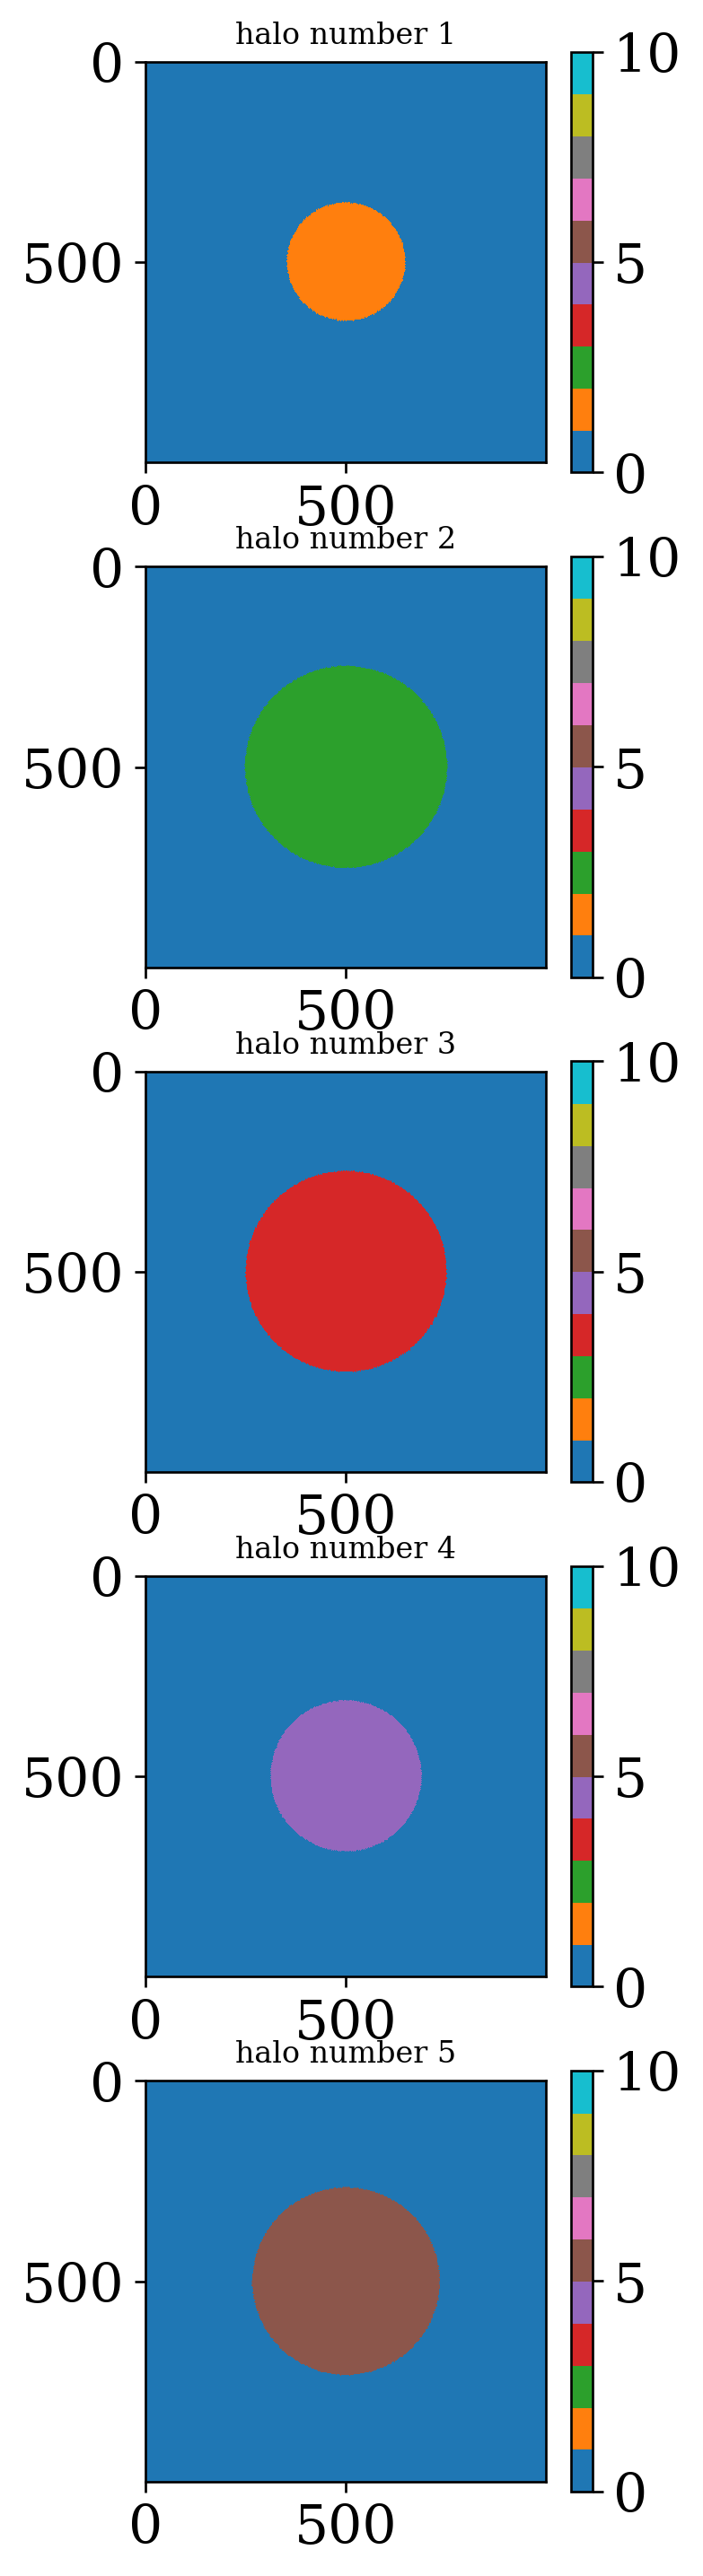

In [37]:
vmin = 0
vmax = canvas.pixels.max()
fig, ax = plt.subplots(n_cutouts, 1, figsize=(3,n_cutouts*3))
for i, cutout in enumerate(stack_generator):
    
    ax[i].set_title(f"halo number {i+1}", fontsize=10)
    im = ax[i].imshow(cutout, vmin=0,vmax=vmax,cmap=canvas.cmap)
    fig.colorbar(im, ax=ax[i])

*Voila!*

# kinetic Sunyaev Zeldovich (NFW)

Now let's try to make a more realistic map. We will generate a larger catalog and then paint the kSZ signal over the halos. 

In [38]:
catalog = Catalog()
catalog.generate_random_box(n_tot=50000,
                            box_size=30,
                            mass_min=1E14,
                            mass_max=1E15,
                            put_on_shell=True)

Building the dataframe and updating all the parameters...

Done!
generating random catalog...

Catalog data has been modified...

Building the dataframe and updating all the parameters...

Done!


In [39]:
canvas = Canvas(catalog,
                nside=512)

In [40]:
kSZ_painter = Painter(template=NFW.kSZ_T)
kSZ_painter.spray(canvas)

The template 'kSZ_T' takes in the following arguments:
['R', 'rho_s', 'R_s', 'v_r']
and the following keyword-only arguments:
['T_cmb']
Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['v_r', 'R_s', 'rho_s'], dtype='object')
Spraying in parallel...

canvas memory size [GB]: 0.023437589406967163

n_cpus = 8
Spraying in 8 batches










Your artwork is finished. Check it out with Canvas.show_map()


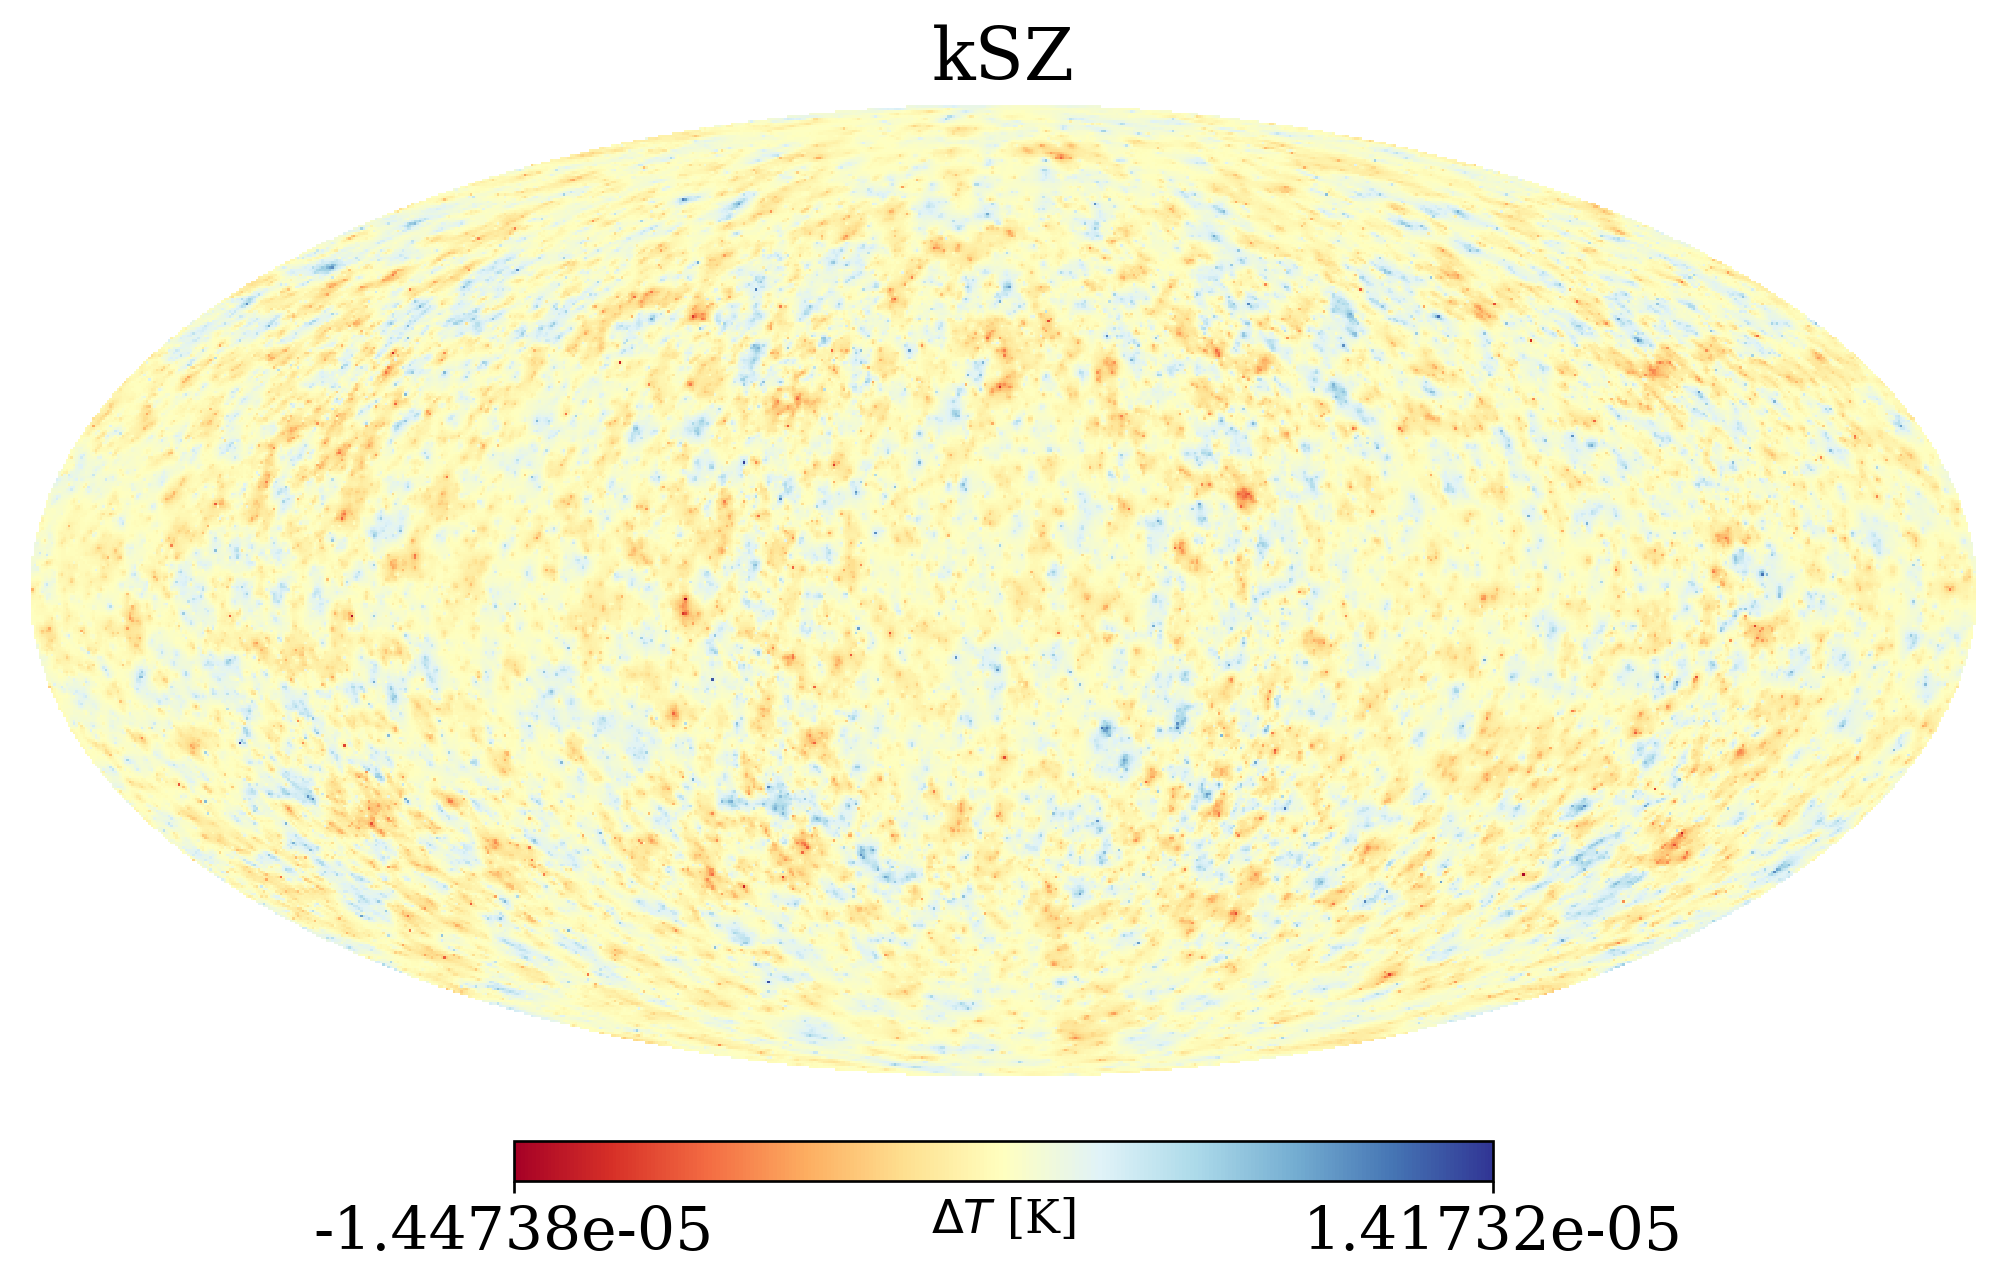

In [41]:
canvas.cmap = cm.RdYlBu
canvas.show_map(title="kSZ",
                unit="$\Delta T$ [K]")

# Birkinshaw-Gull (NFW)

For this one let's load the `websky_2x2` catalog. 

In [42]:
catalog = Catalog("WebSky_2x2")
catalog.cut_lon_lat(lon_range=[0,10],lat_range=[0,10])

Catalog loaded from:
/Users/siavashyasini/Dropbox/cosmology/Projects/2020/AstroPaint/astropaint/data/WebSky_2x2.csv
Building the dataframe and updating all the parameters...

Done!
Catalog data has been modified...

Building the dataframe and updating all the parameters...

Done!


You can also paint signals around the halos that are not axially symmetric. In order to paint asymmetric profiles you should write the profile in terms of $\vec{r}$ (vector pointing from the center of the halo to the pixel) and pass `r_vec` as the first argument instead of `r`. 

In [43]:
canvas = Canvas(catalog,
                nside=8192,
                R_times=10)


In [44]:
painter = Painter(NFW.BG)


The template 'BG' takes in the following arguments:
['R_vec', 'c_200c', 'R_200c', 'M_200c', 'theta', 'phi', 'v_th', 'v_ph']
and the following keyword-only arguments:
['T_cmb']


In [45]:
painter.spray(canvas)

Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['c_200c', 'phi', 'R_200c', 'v_ph', 'theta', 'v_th', 'M_200c'], dtype='object')
Spraying in parallel...

canvas memory size [GB]: 6.000000089406967

n_cpus = 8
Spraying in 8 batches










Your artwork is finished. Check it out with Canvas.show_map()


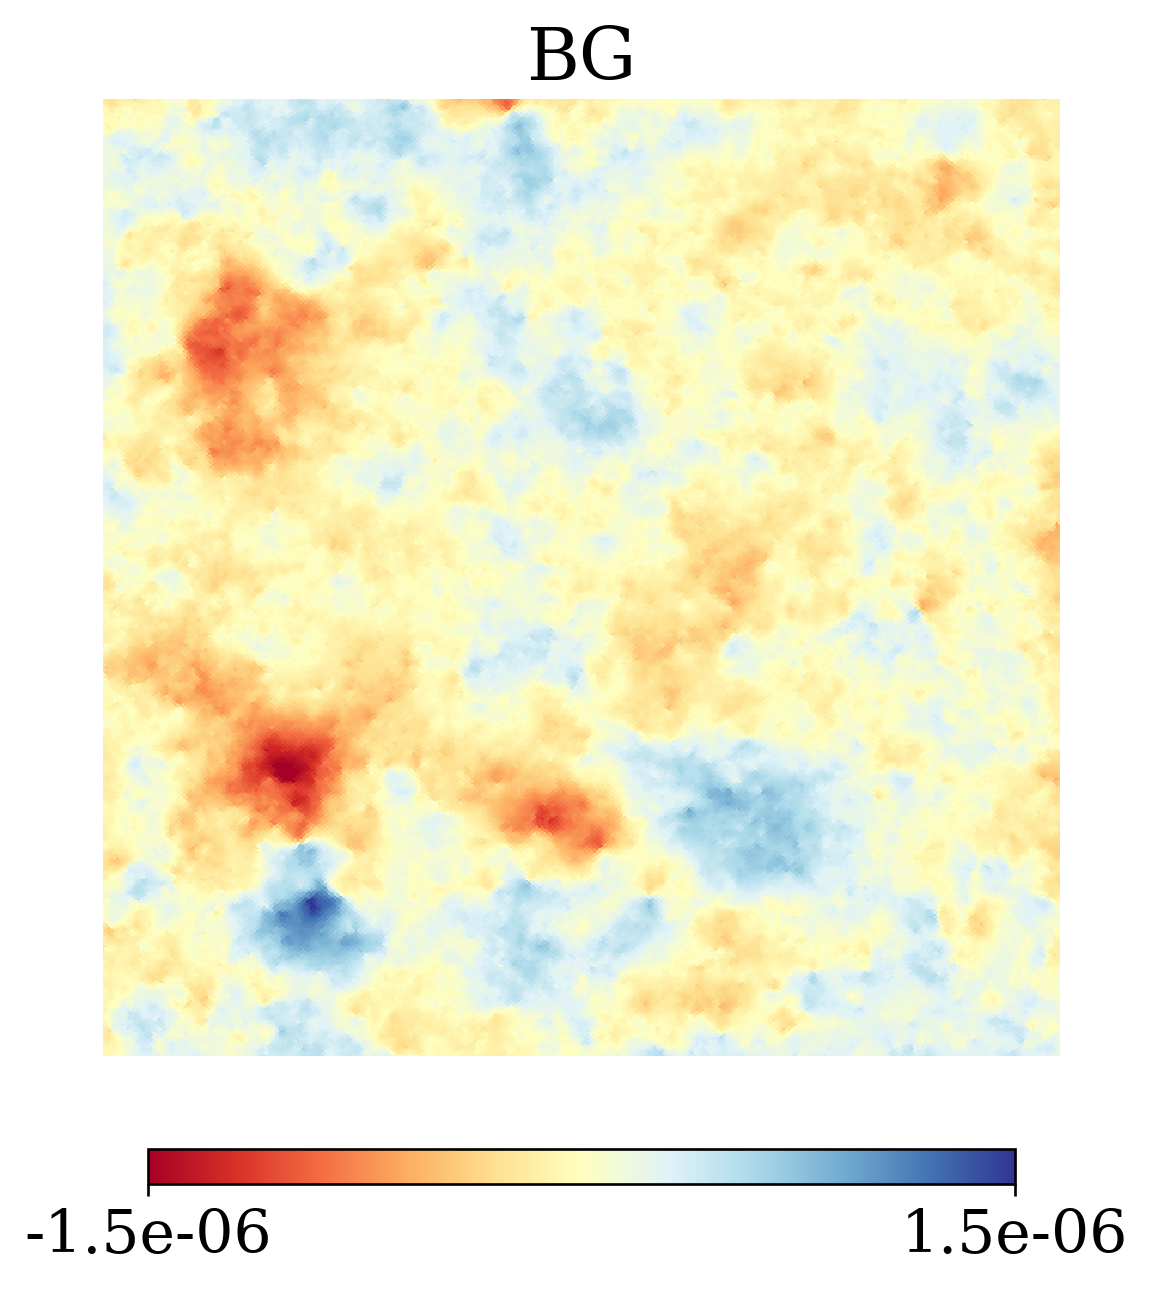

In [46]:
canvas.cmap = cm.RdYlBu
canvas.show_map("cartview",
                lonra=[0,2],
                latra=[0,2],
                title="BG",
                min=-1.5E-6,
                max=1.5E-6,
               )

And here's a zoomed out version (painted separately) in case you're curious:

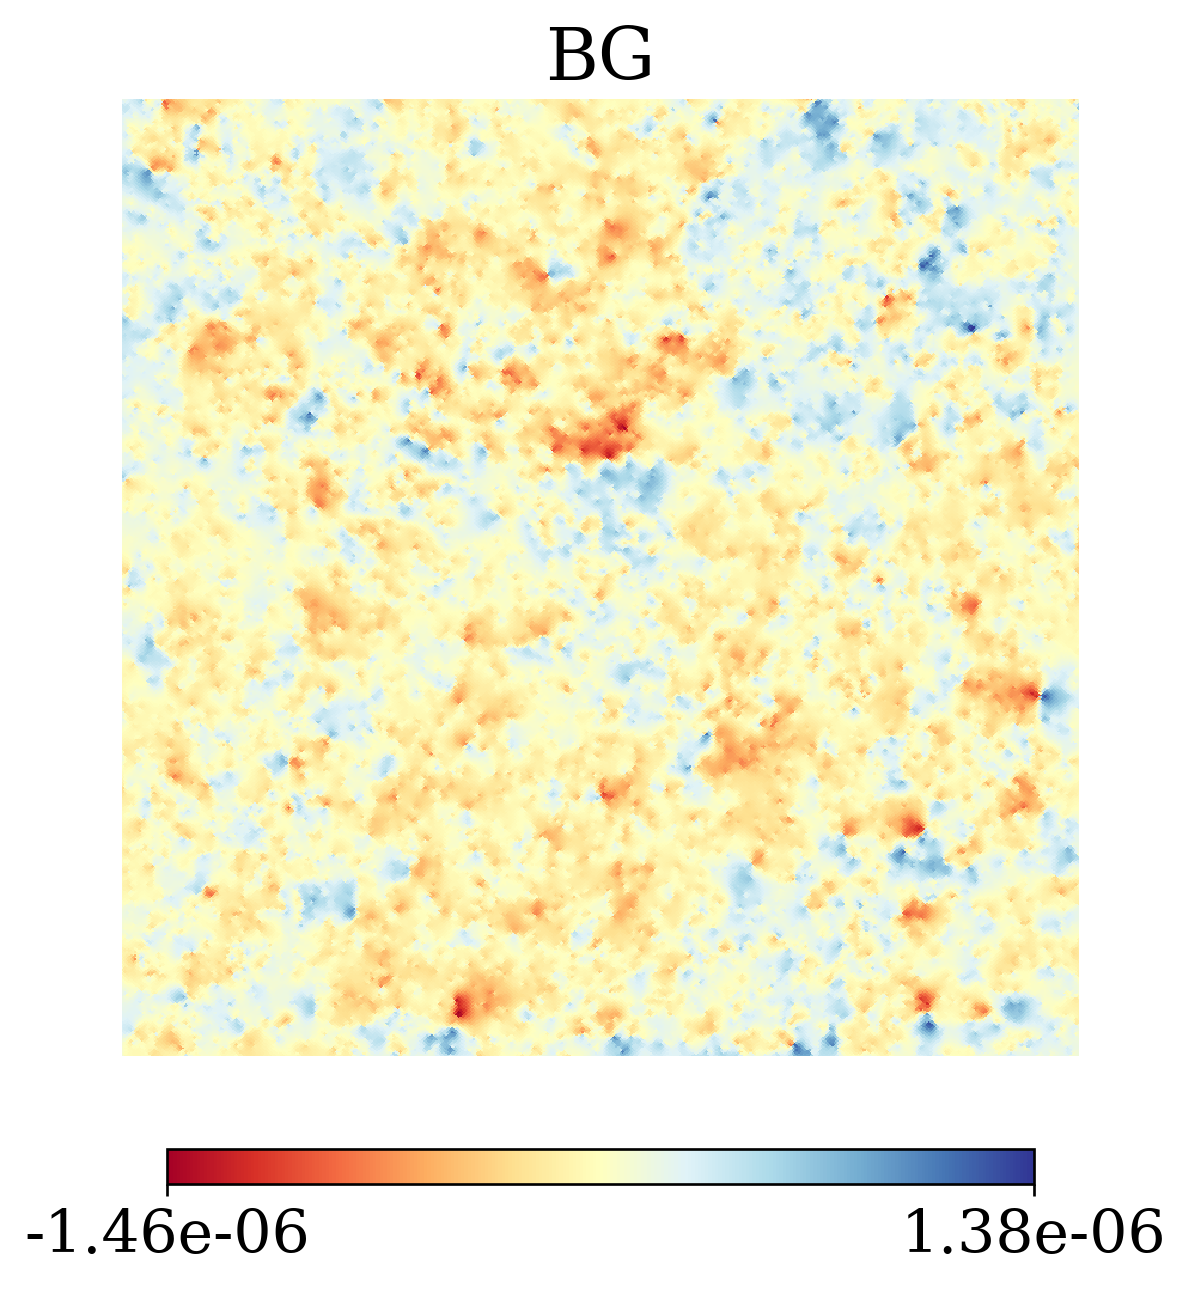

In [61]:
canvas.cmap = cm.RdYlBu
canvas.show_map("cartview",
                lonra=[0,10],
                latra=[0,10],
                title="BG")